# Chapter 09 - Unsupervised Learning Techniques

There are some tasks under the unsupervised learning umbrella such as:

- Clustering
- Anomaly Detection
- Density Estimation

In this chapter, we are going to explore these 3 types of tasks and talk about the algorithms available to perform them.

## Clustering

Clustering is used in a wide variety of applications, including these:

- Customer Segmentation
- Data Analysis
- Dimensionality reduction
- anomaly detection
- semi-supervised learning
- search engines
- segment an image

In this section, we will look at two popular clustering algorithms, K-Means and DBSCAN, and explore some of their applications, such as nonlinear dimensionality reduction, semi-supervised learning, and anomaly detection.

### K-Means

The K-Means algorithm works the following way:

Given a predefined number of clusters, it tries to find the best centroids (center of each cluster), and then assign the centroid to the points that are most near to it.

#### K-Means example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [3]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

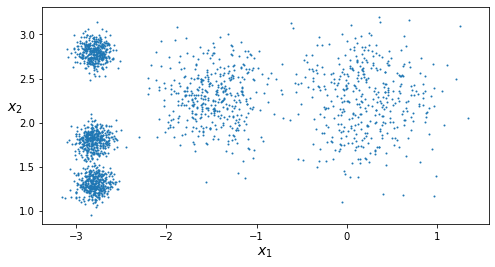

In [4]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

Note that we need to provide the number of centroids at first.

In [5]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [6]:
y_pred

array([4, 1, 0, ..., 3, 0, 1], dtype=int32)

In [7]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [8]:
kmeans.cluster_centers_

array([[ 0.20876306,  2.25551336],
       [-2.80389616,  1.80117999],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

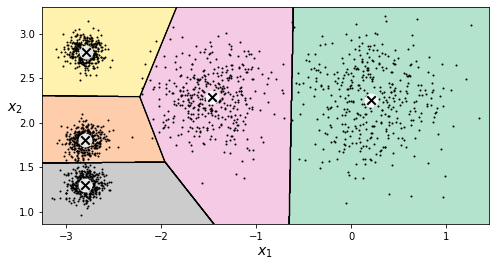

In [9]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

You can easily assign new instances to the cluster whose centroid is closest:

In [10]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([0, 0, 3, 3], dtype=int32)

The vast majority of the instances were clearly assigned to the appropriate cluster, but a few instances were probably mislabeled (especially near the boundary between the top-left cluster and the central cluster). Indeed, the KMeans algorithm does not behave very well when the blobs have very different diameters because all it cares about when assigning an instance to a cluster is the distance to the centroid.

Instead of assigning each instance to a single cluster, which is called hard clustering, it can be useful to give each instance a score per cluster, which is called soft clustering.

In the KMeans class, the *transform()* method measures the distance from each instance to every centroid:

In [11]:
kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

If you have a high-dimensional dataset and you transform it this way, you end up with a k-dimensional dataset: this transformation can be a very efficient nonlinear dimensionality reduction technique.

#### The K-Means algorithm

The K-means algorithm is an iterative process of centroid computation, instance assignment to the centroid, then recompute the centroid and reassign the instances to their closest centroid, and so on, until convergence. The algorithm is guaranteed to converge in a finite number of steps (usually quite small); it will not oscillate forever.

- First initialize $k$ centroids randomly: $k$ distinct instances are chosen randomly from the dataset and the centroids are placed at their locations.
- Repeat until convergence (i.e., until the centroids stop moving):
    - Assign each instance to the closest centroid.
    - Update the centroids to be the mean of the instances that are assigned to them.

The first step is to initialize the centroids, then, the algorithm is responsible for cluster assignment and update of centroids.

In [12]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

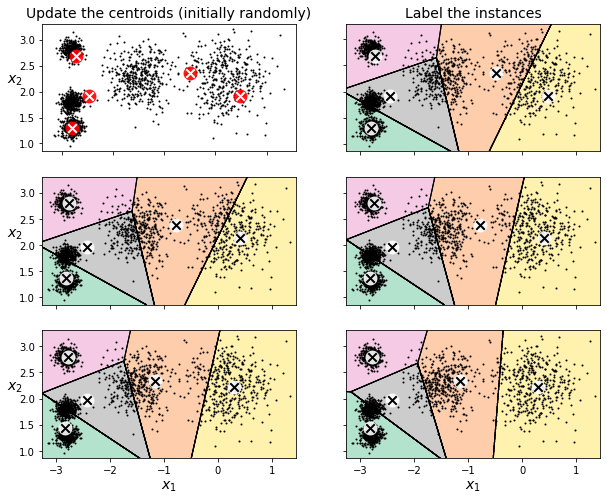

In [13]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In just 3 iterations, the algorithm already reached a suboptimal solution. Be aware that convergence is guaranteed, but it is not guaranteed to converge to the global minimum solution, only local minimum. To mitigate this problem, we must discuss about **centroid initialization**

#### Centroid initialization methods

We can employ some strategies of centroid initialization to ensure convergence to optimal standards. The first one is to run a previous KMeans algorithm and initialize the centroids with the centroids used in the first run.

Another strategy is to run KMeans several times, each time with a differente initialization setup. That's what scikit-learn does. The number of random initializations is controlled by the *n_init* hyperparameter: by default, it is equal to 10, which means that the whole algorithm described earlier runs 10 times when you call *fit()*, and scikit-learn keeps the best solution. 

What is the criteria to choose the best solution? Inertia.

Inertia is the mean squared distance between each instance and its closest centroid. The KMeans class runs the algorithm *n_init* times and keeps the model with the lowest inertia.

In [14]:
kmeans.inertia_

211.59853725816828

The *score()* method returns the negative inertia. Why negative? Because a predictor’s *score()* method must always respect Scikit-Learn’s “greater is better” rule: if a predictor is better than another, its *score()* method should return a greater score.

In [15]:
kmeans.score(X)

-211.59853725816828

An important improvement to the K-Means algorithm, **K-Means++**. It is a smarter way of initializing the centroids. guarantee that each centroid is far apart from the other. Thus, avoiding local minima solution. It has been shown that that the additional computation required for the smarter initialization step is well worth it because it makes it possible to drastically reduce the number of times the algorithm needs to be run to find the optimal solution. Here is the K-Means++ initialization algorithm:

1. Take one centroid $c_1$, chosen uniformly at random from the dataset.
1. Take a new center $c_i$, choosing an instance $\mathbf{x}_i$ with probability: $D(\mathbf{x}_i)^2$ / $\sum\limits_{j=1}^{m}{D(\mathbf{x}_j)}^2$ where $D(\mathbf{x}_i)$ is the distance between the instance $\mathbf{x}_i$ and the closest centroid that was already chosen. This probability distribution ensures that instances that are further away from already chosen centroids are much more likely be selected as centroids.
3. Repeat the previous step until all $k$ centroids have been chosen.

The rest of the algorithm works as we've already seen.

#### Accelerated K-Means and mini-batch K-Means

There are two important variations of K-Means incorporated in the scikit-learn library that is worth mentioning. 

The first one was proposed in 2003  by Charles Elkan, It considerably accelerates the algorithm by avoiding many unnecessary distance calculations. Elkan achieved this by exploiting the triangle inequality (i.e., that a straight line is always the shortest distance between two points) and by keeping track of lower and upper bounds
for distances between instances and centroids. This is the algorithm the *KMeans* class uses by default (you can force it to use the original algorithm by setting the algorithm hyperparameter to *"full"*, although you probably will never need to).

The second important variation of the K-means algorithm is that instead of using the full dataset at each iteration, we can feed K-Means with part of the data in mini batches, and perform update at each batch, moving the centroids slightly. This speeds up the algorithm typically by a factor of three or four and makes it possible to cluster huge datasets that do not fit in memory. Scikit-Learn implements this algorithm in the *MiniBatchKMeans* class. You can just use this class like the KMeans class:

In [16]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

If the dataset does not fit in memory, the simplest option is to use *memmap* class, a function implement in numpy that let you read an array from a binary file chunk by chunk and feed it to the model. For an example, see the notebook of the book.

Although the Mini-batch K-Means is much faster than the regular K-Means, it comes it a price. The quality of the solution found by Mini-batch is slightly worse. Nevertheless, as the number of clusters increases Mini-batch is much much faster than regular K-Means. Therefore, it might be worth it.

#### Finding the optimal number of clusters                                                                                                      

So far, we've explicitly set the number of clusters to 5. Indeed, we ourselves generated the data and forced it to have 5 groups. However, that is not the case in the real world. So, how to choose the optimal number of clusters?

We could consider the inertia as a metric, but that would be very misleading because as the number of clusters increases, the instances tend to be closer to their centroid. Thus, the inertia would be lower. Therefore, we would expect that 6 clusters would have a lower inertia than 5, but 5 is the right choice as we know by heart.

There are two methods used to select the right number of clusters: **the elbow method**, and analyse the **silhouette score**.

##### The elbow Method

The elbow method consists of a visualization technique, where we plot the inertia (y-axis) against the number of clusters (x-axis). Then, we will observe that at a certain *k*, the start dropping inertia only by a small amount as the number of *k* continue to increases.  

In [17]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

In [18]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

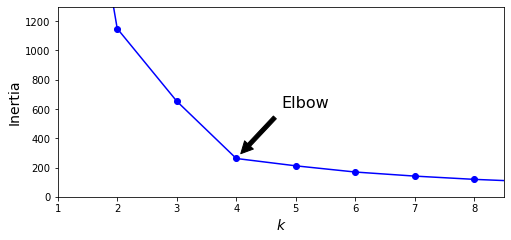

In [19]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)

plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )

plt.axis([1, 8.5, 0, 1300])
plt.show()

This is called the *Elbow* method because of the elbow-like shape of the graph. In this example, even though we know that 5 is the right solution, we would choose 4 as the right answer because from that point, we don't get a significantly improvement in the inertia score. As you can see, the elbow method gives us a good solution, but it might not be the best.

###### Silhouette Score

A more robust (but also more computationally expensive) way of finding the optimal number of clusters is using the *silhouette score*, which is the mean silhouette coefficient over all the instances. 

An instance's silhouette coefficient is equal to $\frac{b-a}{max(a, b)}$, where *a* is the mean distance to the other instances in the same cluster (i.e., the mean intra-cluster distance) and *b* is the mean nearest-cluster distance (i.e., the mean distance to the instances of the next closest cluster, defined as the one that minimizes *b*, excluding the instance's own cluster). The silhouette coefficient can vary between –1 and +1. A coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to –1 means that the instance may have been assigned to the wrong cluster.

In [20]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.655517642572828

In [21]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

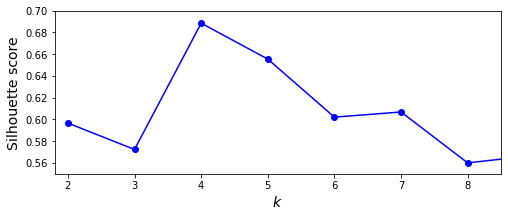

In [22]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])

plt.show()

In the graph we see again that 4 looks like the best choice. However, now we can see that 5 is in the second place and much better and 6 or 7. An even more informative visualization is obtained when you plot every instance’s silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a silhouette diagram (see Figure 9-10). Each diagram contains one knife shape per cluster. The shape’s height indicates the number of instances the cluster contains, and its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better). The dashed line indicates the mean silhouette coefficient.

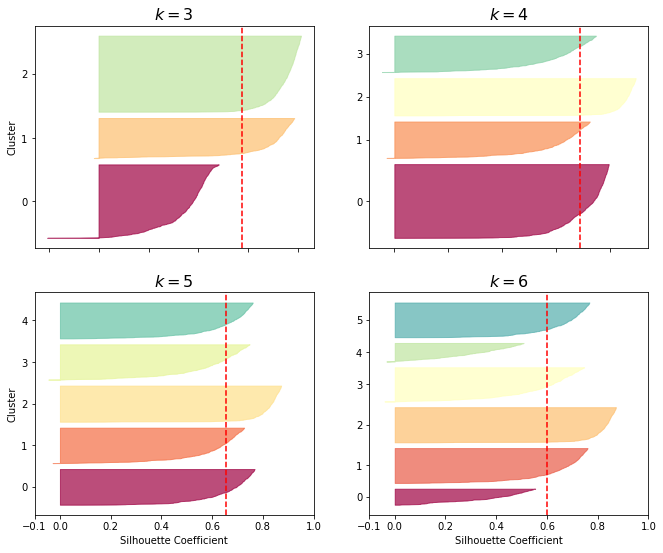

In [23]:
import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

The vertical dashed lines represent the silhouette score for each number of clusters. When most of the instances in a cluster have a lower coefficient than this score (i.e., if many of the instances stop short of the dashed line, ending to the left of it), then the cluster is rather bad since this means its instances are much too close to other clusters. We can see that when k = 3 and when k = 6, we get bad clusters. But when k = 4 or k = 5, the clusters look pretty good: most instances extend beyond the dashed line, to the right and closer to 1.0. When k =
4, the cluster at index 1 (the third from the top) is rather big. When k = 5, all clusters have similar sizes. So, even though the overall silhouette score from k = 4 is slightly greater than for k = 5, it seems like a good idea to use k = 5 to get clusters of similar sizes.

#### Limits of K-Means

K-Means is fast and scales well. However, it has some drawbacks such as need to initialize the centroid multiple times and run the algorithm all over to select the best initilization, or choosing the right number of clusters. Moreover, it does not perform well when the clusters have varying size, different densities, or nonspherical shapes. For that, we would be better off with Gaussian Mixtures Models, which we'll see later.

**An import note, however, is to scale the input features before you run K-Means, or the clusters may be very stretched and K-Means will perform poorly. Scaling the features does not guarantee that all the clusters will be nice and spherical, but it generally improves things.**

### Using Clustering for Image Segmentation

KMeans can be used to perform image segmentation for simple tasks such as *color segmentation*. This is very useful if you want to analyze satellite images to measure how much total forest area there is in a region, color segmentation may be just fine.

### Using Clustering for Preprocessing

Clustering can be an efficient approach to dimensionality reduction, in particular as a preprocessing step before a supervised learning algorithm. As an example of using clustering for dimensionality reduction, let’s tackle the digits dataset, which is a simple MNIST-like dataset containing 1,797 grayscale 8 × 8 images representing digits 0 to 9:

In [24]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [25]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9644444444444444

**96.00% is our baseline**

In [26]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
  ("kmeans", KMeans(n_clusters=50)),
  ("log_reg", LogisticRegression()),
])

pipeline.fit(X_train, y_train)

pipeline.score(X_test, y_test)

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9533333333333334

**with dimensionality reduction we improved to 96.22%**

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3)
grid_clf.fit(X_train, y_train)

print(grid_clf.best_params_)

grid_clf.score(X_test, y_test)

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

{'kmeans__n_clusters': 73}


/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9555555555555556

**using gridsearchcv we improved to 97.33%**

### Using Clustering for Semi-Supervised Learning

Another use case for clustering is in semi-supervised learning, when we have plenty of unlabeled instances and very few labeled instances. Let's train a model on 50 labeled instances of the digits dataset:

In [28]:
n_labeled = 50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

log_reg.score(X_test, y_test)

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8111111111111111

Now, Let's cluster the dataset into 50 clusters and choose the images closer to the centroids and choose them as representatives for training.

In [29]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

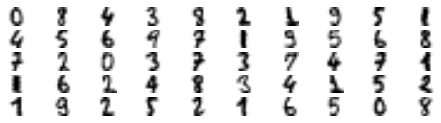

In [30]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [31]:
y_representative_digits = y_train[representative_digit_idx]

In [32]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8955555555555555

Using the best representatives we boosted to 92%

what if we propagated the labels to all the other instances in the same cluster?

In [33]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

log_reg.score(X_test, y_test)

0.9155555555555556

Propagating the labels to all instances we improved only a little. This may be because of the instances that lie closer to decision boundaries. So, instead of propagating to all instances, let's propagate only to the 20% instances more close to the centroid.

In [34]:
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
  in_cluster = (kmeans.labels_ == i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1
  
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression()
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

/home/alexandre/anaconda3/envs/eda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9311111111111111

In this particular case, we didn't improved much.

### DBSCAN

This algorithm defines clusters as continuous regions of high density. Here is how it works:

- For each instance, the algorithm counts how many instances are located within a small distance ε (epsilon) from it. This region is called the instance’s ε-neighborhood.
- If an instance has at least min_samples instances in its ε-neighborhood (including itself), then it is considered a core instance. In other words, core instances are those that are located in dense regions.
- All instances in the neighborhood of a core instance belong to the same cluster. This neighborhood may include other core instances; therefore, a long sequence of neighboring core instances forms a single cluster.
- Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.

In [35]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)

dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [36]:
dbscan.labels_

array([-1,  0,  1,  2,  3,  4,  2,  2,  7,  2,  0,  5,  4, 10,  4,  6,  5,
       -1,  0,  5,  5,  7,  7,  2, -1,  7,  8,  2,  0,  0,  8,  1,  0,  2,
        8,  8,  6,  2,  6, -1, -1,  0,  2,  1,  2, -1,  8,  5,  8,  8,  2,
        5,  2,  8,  6,  6,  9,  7, 12,  0,  7,  2,  6, 10,  8,  8,  4,  0,
        4,  0, -1,  5,  7,  1,  1, -1, 10, 11, -1,  7,  0,  7, -1,  4,  2,
        2,  7,  7,  8,  5, 11,  2,  7,  0, 11,  5,  1,  7,  0,  7, -1,  0,
        7,  7,  0,  8,  4,  4,  4,  0,  4,  8,  7,  7,  2,  4,  2,  8,  5,
        4,  7,  6,  2,  7,  6,  4,  9,  7,  5, -1,  2,  7,  8,  5,  7,  5,
        2,  2, 11,  0,  2,  7,  3,  8,  0,  7,  4, 11,  3,  6,  2, 12,  3,
       -1,  2,  5,  7,  4,  2,  3,  9, 10,  3,  3,  7,  8,  2,  2,  0,  9,
        8,  4,  7,  2,  2,  5,  6, -1, 13,  2, 12, 10,  0, -1, 11,  5,  6,
        0,  7,  5,  8,  2, 11, 10,  2,  7,  0,  7, 12,  8,  5,  8, 10, 10,
       -1,  2,  5,  2, 12,  2,  5,  0, -1,  8,  7,  2,  7, -1,  9,  8,  7,
        1, 12, -1,  7, 12

The instances labels -1 are classified as anomalies, and are not bound to any cluster.

In [37]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [38]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

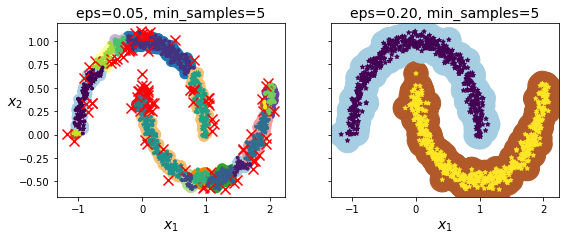

In [39]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

With eps=0.05, the algorithm identified seven different clusters and several anomalies. That's no good. Nevertheless, setting eps to 0.2 gaves us a perfect result.

### Other Clustering Algorithms

- Agglomerative clustering

A hierarchy of clusters is built from the bottom up. Think of many tiny
bubbles floating on water and gradually attaching to each other until there’s
one big group of bubbles. Similarly, at each iteration, agglomerative
clustering connects the nearest pair of clusters (starting with individual
instances). If you drew a tree with a branch for every pair of clusters that
merged, you would get a binary tree of clusters, where the leaves are the
individual instances. This approach scales very well to large numbers of
instances or clusters. It can capture clusters of various shapes, it produces a
flexible and informative cluster tree instead of forcing you to choose a
particular cluster scale, and it can be used with any pairwise distance. It can
scale nicely to large numbers of instances if you provide a connectivity
matrix, which is a sparse m × m matrix that indicates which pairs of instances
are neighbors (e.g., returned by
sklearn.neighbors.kneighbors_graph()). Without a connectivity
matrix, the algorithm does not scale well to large datasets.

- BIRCH

The BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)
algorithm was designed specifically for very large datasets, and it can be
faster than batch K-Means, with similar results, as long as the number of
features is not too large (<20). During training, it builds a tree structure
containing just enough information to quickly assign each new instance to a
cluster, without having to store all the instances in the tree: this approach
allows it to use limited memory, while handling huge datasets.

- Mean-Shift

This algorithm starts by placing a circle centered on each instance; then for
each circle it computes the mean of all the instances located within it, and it
shifts the circle so that it is centered on the mean. Next, it iterates this meanshifting step until all the circles stop moving (i.e., until each of them is
centered on the mean of the instances it contains). Mean-Shift shifts the
circles in the direction of higher density, until each of them has found a local
density maximum. Finally, all the instances whose circles have settled in the
same place (or close enough) are assigned to the same cluster. Mean-Shift
has some of the same features as DBSCAN, like how it can find any number
of clusters of any shape, it has very few hyperparameters (just one—the
radius of the circles, called the bandwidth), and it relies on local density
estimation. But unlike DBSCAN, Mean-Shift tends to chop clusters into
pieces when they have internal density variations. Unfortunately, its
computational complexity is O(m ), so it is not suited for large datasets

- Affinity propagation

This algorithm uses a voting system, where instances vote for similar
instances to be their representatives, and once the algorithm converges, each
representative and its voters form a cluster. Affinity propagation can detect
any number of clusters of different sizes. Unfortunately, this algorithm has a
computational complexity of O(m ), so it too is not suited for large datasets.

- Spectral clustering

This algorithm takes a similarity matrix between the instances and creates a
low-dimensional embedding from it (i.e., it reduces its dimensionality), then
it uses another clustering algorithm in this low-dimensional space (ScikitLearn’s implementation uses K-Means.) Spectral clustering can capture
complex cluster structures, and it can also be used to cut graphs (e.g., to
identify clusters of friends on a social network). It does not scale well to
large numbers of instances, and it does not behave well when the clusters
have very different sizes.

## Gaussian Mixtures

A Gaussian mixture model (GMM) is a probabilistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown. All the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid.

In [40]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [41]:
gm.weights_

array([0.1964508 , 0.19918   , 0.60436919])

In [42]:
gm.means_

array([[ 1.75829139, -0.04210188],
       [-0.75408492,  0.55376193],
       [ 0.50344089,  0.24743024]])

In [43]:
gm.covariances_

array([[[ 0.04843124,  0.05938864],
        [ 0.05938864,  0.0880118 ]],

       [[ 0.04677719,  0.05766323],
        [ 0.05766323,  0.08453105]],

       [[ 0.1787273 , -0.11151409],
        [-0.11151409,  0.29234234]]])

Now that you have an estimate of the location, size, shape, orientation, and relative weight of each cluster, the model can easily assign each instance to the most likely cluster (hard clustering) or estimate the probability that it belongs to a particular cluster (soft clustering). Just use the *predict()* method for hard clustering, or the *predict_proba()* method for soft clustering:

In [45]:
# gm.predict(X)
gm.predict_proba(X)

array([[3.03686401e-171, 2.20316071e-004, 9.99779684e-001],
       [6.16670696e-234, 9.99235769e-001, 7.64231135e-004],
       [9.61652603e-001, 1.07743000e-246, 3.83473972e-002],
       ...,
       [1.51613750e-173, 5.69945236e-004, 9.99430055e-001],
       [9.71497586e-069, 1.93795874e-049, 1.00000000e+000],
       [9.99148489e-001, 6.11067673e-253, 8.51511492e-004]])

A Gaussian mixture model is a generative model, meaning you can sample new instances from it (note that they are ordered by cluster index):

In [46]:
X_new, y_new = gm.sample(6)
X_new, y_new

(array([[ 1.811198  , -0.09824631],
        [-1.20132841,  0.23560177],
        [-0.80037486,  0.62923562],
        [-0.92593672,  0.27395024],
        [ 0.1817971 ,  1.23744797],
        [-0.28412015, -0.13616211]]),
 array([0, 1, 1, 1, 2, 2]))

Just like other algorithms, depending on the initilization of the parameters, the EM algorithm might not converge. To mitigate that problem, we can play with the *n_init* parameter. Also, for many dimensions, clusters, and few instances, the EM algorithm can struggle to converge to the optimal solution.  You might need to reduce the difficulty of the task by limiting the number of parameters that the algorithm has to learn. One way to do this is to limit the range of shapes and orientations that the clusters can have. This can be achieved by imposing constraints on the covariance matrices. To do this, set the *covariance_type* hyperparameter to one of the following values:

- spherical:
All clusters must be spherical, but they can have different diameters (i.e.,
different variances).

- diag:
Clusters can take on any ellipsoidal shape of any size, but the ellipsoid’s axes
must be parallel to the coordinate axes (i.e., the covariance matrices must be
diagonal).

- tied:
All clusters must have the same ellipsoidal shape, size, and orientation (i.e.,
all clusters share the same covariance matrix).

By default, *covariance_type* is equal to *full*, which means that each cluster
can take on any shape, size, and orientation (it has its own unconstrained
covariance matrix).

### Anomaly Detection Using Gaussian Mixtures

Using a Gaussian mixture model for anomaly detection is quite simple: any instance located in a low-density region can be considered an anomaly. You must define what density threshold you want to use. For example, in a manufacturing company that tries to detect defective products, the ratio of defective products is usually well known. Say it is equal to 4%. You then set the density threshold to
be the value that results in having 4% of the instances located in areas below that
threshold density. If you notice that you get too many false positives (i.e.,
perfectly good products that are flagged as defective), you can lower the
threshold. Conversely, if you have too many false negatives (i.e., defective
products that the system does not flag as defective), you can increase the
threshold. This is the usual precision/recall trade-off (see Chapter 3). Here is
how you would identify the outliers using the fourth percentile lowest density as
the threshold (i.e., approximately 4% of the instances will be flagged as
anomalies):

In [48]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

### Selecting the Number of Clusters

With K-Means, you could use the inertia or the silhouette score to select the appropriate number of clusters. But with Gaussian mixtures, it is not possible to use these metrics because they are not reliable when the clusters are not spherical or have different sizes. Instead, you can try to find the model that minimizes a theoretical information criterion, such as the Bayesian information criterion (BIC) or the Akaike information criterion (AIC), defined in Equation 9-1.

$$
BIC = \log(m)p - 2\log(\hat{L})
$$

$$
AIC = 2p - 2\log(\hat{L})
$$

where, *m* is the number of instances, *p* is the number of parameters learned by the model, and *$\hat{L}$* is the maximized value of the likelihood function of the model.

Both the BIC and the AIC penalize models that have more parameters to learn (e.g., more clusters) and reward models that fit the data well. They often end up selecting the same model. When they differ, the model selected by the BIC tends to be simpler (fewer parameters) than the one selected by the AIC, but tends to not fit the data quite as well (this is especially true for larger datasets).

In [49]:
gm.bic(X)

2729.2329912711207

In [50]:
gm.aic(X)

2645.8011515284243

To choose the best number of clusters, use a similar strategy to the elbow method. Train models varying number of clusters, then choose the one with the minimum BIC or AIC.

### Bayesian Gaussian Mixture Models

Rather than manually searching for the optimal number of clusters, you can use the BayesianGaussianMixture class, which is capable of giving weights equal (or close) to zero to unnecessary clusters. Set the number of clusters n_components to a value that you have good reason to believe is greater than the optimal number of clusters (this assumes some minimal knowledge about the problem at hand), and the algorithm will eliminate the unnecessary clusters automatically. For example, let’s set the number of clusters to 10 and see what
happens:

In [51]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.17, 0.12, 0.2 , 0.17, 0.09, 0.13, 0.13, 0.  , 0.  , 0.  ])

### Other Algorithms for Anomaly and Novelty Detection

- PCA (and other dimensionality reduction techniques with an *inverse_transform()* method)

If you compare the reconstruction error of a normal instance with the
reconstruction error of an anomaly, the latter will usually be much larger.
This is a simple and often quite efficient anomaly detection approach (see
this chapter’s exercises for an application of this approach).

- Fast-MCD (minimum covariance determinant)

Implemented by the EllipticEnvelope class, this algorithm is useful for
outlier detection, in particular to clean up a dataset. It assumes that the
normal instances (inliers) are generated from a single Gaussian distribution
(not a mixture). It also assumes that the dataset is contaminated with outliers
that were not generated from this Gaussian distribution. When the algorithm
estimates the parameters of the Gaussian distribution (i.e., the shape of the
elliptic envelope around the inliers), it is careful to ignore the instances that
are most likely outliers. This technique gives a better estimation of the
elliptic envelope and thus makes the algorithm better at identifying the
outliers.

- Isolation Forest

This is an efficient algorithm for outlier detection, especially in highdimensional datasets. The algorithm builds a Random Forest in which each Decision Tree is grown randomly: at each node, it picks a feature randomly,
then it picks a random threshold value (between the min and max values) to
split the dataset in two. The dataset gradually gets chopped into pieces this
way, until all instances end up isolated from the other instances. Anomalies
are usually far from other instances, so on average (across all the Decision
Trees) they tend to get isolated in fewer steps than normal instances.

- Local Outlier Factor (LOF)

This algorithm is also good for outlier detection. It compares the density of
instances around a given instance to the density around its neighbors. An
anomaly is often more isolated than its k nearest neighbors.

- One-class SVM

This algorithm is better suited for novelty detection. Recall that a kernelized
SVM classifier separates two classes by first (implicitly) mapping all the
instances to a high-dimensional space, then separating the two classes using
a linear SVM classifier within this high-dimensional space (see Chapter 5).
Since we just have one class of instances, the one-class SVM algorithm
instead tries to separate the instances in high-dimensional space from the
origin. In the original space, this will correspond to finding a small region
that encompasses all the instances. If a new instance does not fall within this
region, it is an anomaly. There are a few hyperparameters to tweak: the usual
ones for a kernelized SVM, plus a margin hyperparameter that corresponds
to the probability of a new instance being mistakenly considered as novel
when it is in fact normal. It works great, especially with high-dimensional
datasets, but like all SVMs it does not scale to large datasets.